# Schrodinger equation in 1D

## Harmonic Oscillator

**References:**

1. https://www.fisica.uniud.it/~giannozz/Corsi/MQ/LectureNotes/mq.pdf

2. https://phys.libretexts.org/Bookshelves/University_Physics/University_Physics_(OpenStax)/University_Physics_III_-_Optics_and_Modern_Physics_(OpenStax)/07%3A_Quantum_Mechanics/7.06%3A_The_Quantum_Harmonic_Oscillator

### The ground state on $+x$ axis

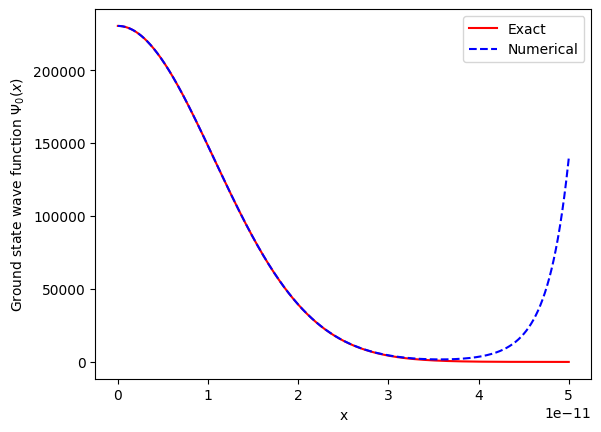

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
m = 1.67 * 10**-27
freq = 8.88 * 10**13
w = 2 * np.pi * freq
hbar = 1.054 * 10**-34
# print(m, freq, hbar)

# State index = number of nodes
n = 0

# Define energy (in eV)
E = (n + 0.5) * hbar * w

# Grid points in 1D
N = 10000   # Number of grid points.
L = 1 * 10**-10   # Length upto which the wave function will be plotted.
x = np.linspace(0, L, N)
# print(x)

# Step length or grid point interval
dx = L / N

# Potential energy
V = 0.5 * m * w**2 * x**2

# Some functions
g = ((2 * m) / hbar**2) * (E - V)
f = 1 + (g * (dx**2 / 12))
# print(f)
# print(g)

# Initial conditions
A = ((m * w) / (np.pi * hbar))**(0.25)
y0 = ((m * w) / (np.pi * hbar))**(0.25)
y1 = ((12 - 10*f[0]) * y0) / (2*f[1])


# Solution of wave function or eigenfunction using Numerov's method
f0 = f[0]
f1 = f[1]
f2 = f[2]

# Collect the wave function values at the grid points
Y_on_positive_x_axis = [y0, y1]

for i in range(2, N):
    y = (((12 - 10 * f1) * y1) - (f0 * y0)) / f2
    Y_on_positive_x_axis.append(y)
    y0 = y1
    y1 = y
    f0 = f[i-1]
    f1 = f[i]
    if i < (N-1):
        f2 = f[i+1]
    else:
        f2 = f[N-1]

Y_on_positive_x_axis = np.array(Y_on_positive_x_axis)
# print(Y_on_positive_x_axis)

# Exact solution
Y_exact = A * np.exp(-0.5 * ((m * w) / hbar) * x**2)


# Plot

# Solution shown in short range (only on the +x axis)
# We have shown the plot of only first 5000 grid points as the numerical solution diverges at large |x|.
plt.plot(x[0:5000], Y_exact[0:5000], 'r')   # Exact solution.
plt.plot(x[0:5000], Y_on_positive_x_axis[0:5000], 'b--')   # Numerical solution.
plt.legend(['Exact', 'Numerical'])
plt.xlabel('x')
plt.ylabel('Ground state wave function $\Psi_0(x)$')
plt.show()

# We clearly see that when |x| is small, the numerical solution exactly matches with the exact solution, and
# the numerical solution starts to diverge at large |x| from the exact solution.

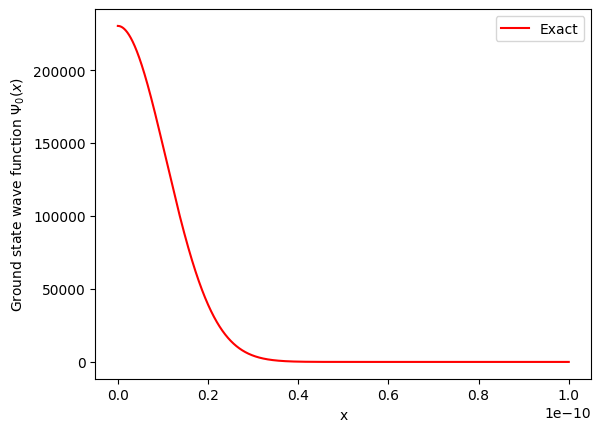

In [ ]:
# Exact solution in full range (only on the +x axis)
plt.plot(x, Y_exact, color = 'r')   # Exact solution
plt.legend(['Exact'])
plt.xlabel('x')
plt.ylabel('Ground state wave function $\Psi_0(x)$')
plt.show()

### The ground state on both $-x$ and $+x$ axes

In the above we have showed the solution only on the $+x$ axis.

Now we will plot the solution in the entire region i.e., on both the $-x$ and $+x$ axes.

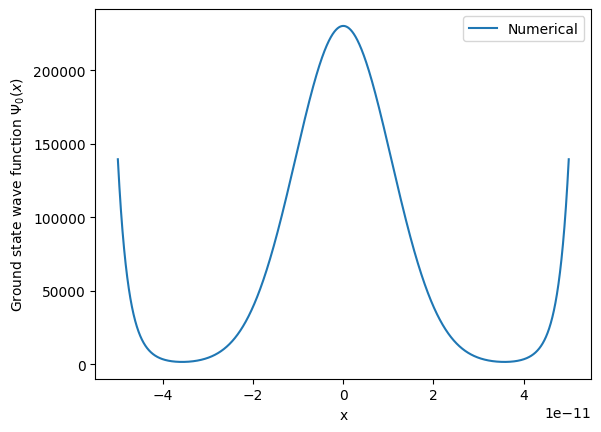

In [ ]:
# The numerical solution in the full range (on both the -x and +x axes)

# As the potential is symmetric i.e., V(-x) = V(x), The wave function will be, Psi_n(-x) = (-1)^n Psi_n(x)
Y_on_negative_x_axis = (-1)**n * Y_on_positive_x_axis
# print(Y_on_negative_x_axis)

# Concatenate the solutions of -x and +x axes to get the full range solution
Y_total = np.concatenate((np.flip(Y_on_negative_x_axis), Y_on_positive_x_axis))   # Note that here we first reverse the Y_on_negative_x_axis and then concatenate with the Y_on_positive_x_axis.

# print(len(Y_on_negative_x_axis))
# print(len(Y_on_positive_x_axis))
# print(len(Y_total))

# Plot
x = np.linspace(-L, L, 2*N)
plt.plot(x[5000:15000], Y_total[5000:15000])
plt.legend(['Numerical'])
plt.xlabel('x')
plt.ylabel('Ground state wave function $\Psi_0(x)$')
plt.show()
plt.show()


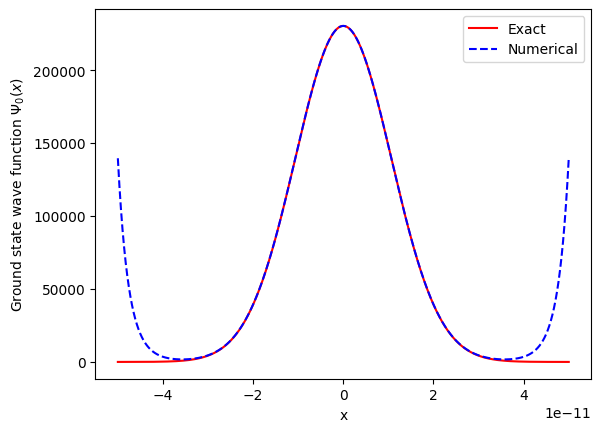

In [ ]:
# Comparison of the numerical and exact solution in the full range (on both the -x and +x axes)

x = np.linspace(-L, L, 2*N)

# Exact solution
Y_exact = A * np.exp(-0.5 * ((m * w) / hbar) * x**2)

# Plot
plt.plot(x[5000:15000], Y_exact[5000:15000], 'r')
plt.plot(x[5000:15000], Y_total[5000:15000], 'b--')
plt.legend(['Exact', 'Numerical'])
plt.xlabel('x')
plt.ylabel('Ground state wave function $\Psi_0(x)$')
plt.show()
plt.show()


**Combining everything for the ground state wave function**

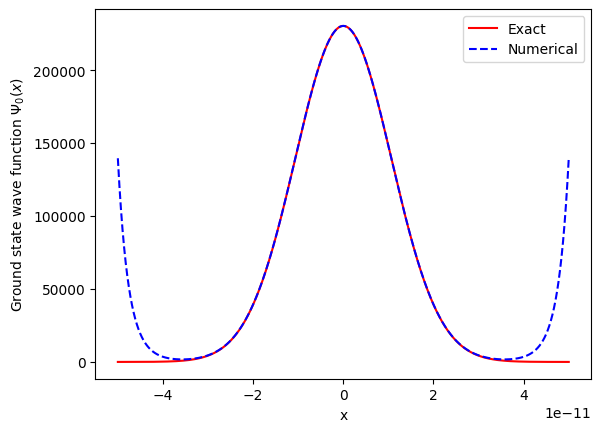

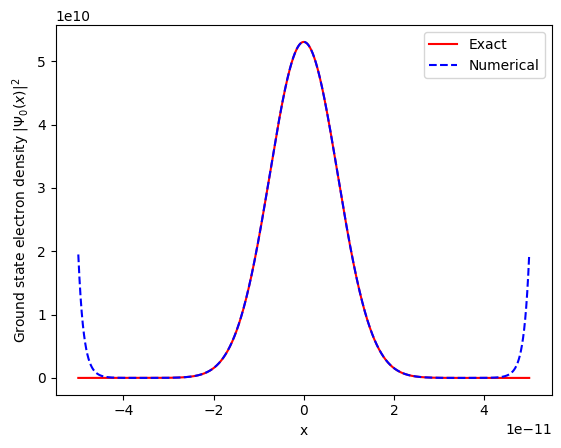

In [ ]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
m = 1.67 * 10**-27
freq = 8.88 * 10**13
w = 2 * np.pi * freq
hbar = 1.054 * 10**-34
# print(m, freq, hbar)

# State index = number of nodes
n = 0

# Define energy (in eV)
E = (n + 0.5) * hbar * w

# Grid points in 1D
N = 10000   # Number of grid points.
L = 1 * 10**-10   # Length upto which the wave function will be plotted.
x = np.linspace(0, L, N)
# print(x)

# Step length or grid point interval
dx = L / N

# Potential energy
V = 0.5 * m * w**2 * x**2

# Some functions
g = ((2 * m) / hbar**2) * (E - V)
f = 1 + (g * (dx**2 / 12))
# print(f)
# print(g)

# Initial conditions
A = (1 / (np.sqrt(2**n * math.factorial(n)))) * (((m * w) / (np.pi * hbar))**(0.25))
y0 = A
y1 = ((12 - 10*f[0]) * y0) / (2*f[1])


# Solution of wave function or eigenfunction using Numerov's method
f0 = f[0]
f1 = f[1]
f2 = f[2]

# Collect the wave function values at the grid points
Y_on_positive_x_axis = [y0, y1]

for i in range(2, N):
    y = (((12 - 10 * f1) * y1) - (f0 * y0)) / f2
    Y_on_positive_x_axis.append(y)
    y0 = y1
    y1 = y
    f0 = f[i-1]
    f1 = f[i]
    if i < (N-1):
        f2 = f[i+1]
    else:
        f2 = f[N-1]

Y_on_positive_x_axis = np.array(Y_on_positive_x_axis)
# print(Y_on_positive_x_axis)

# Exact solution
Y_exact = A * np.exp(-0.5 * ((m * w) / hbar) * x**2)

# As the potential is symmetric i.e., V(-x) = V(x), The wave function will be, Psi_n(-x) = (-1)^n Psi_n(x)
Y_on_negative_x_axis = (-1)**n * Y_on_positive_x_axis
# print(Y_on_negative_x_axis)

# Concatenate the solutions of -x and +x axes to get the full range solution
Y_total = np.concatenate((np.flip(Y_on_negative_x_axis), Y_on_positive_x_axis))   # Note that here we first reverse the Y_on_negative_x_axis and then concatenate with the Y_on_positive_x_axis.


# Plot

# Comparison of the numerical and exact solution in the full range (on both the -x and +x axes)

x = np.linspace(-L, L, 2*N)

# Exact solution
Y_exact = A * np.exp(-0.5 * ((m * w) / hbar) * x**2)

# Plot
# Ground state wave function
plt.plot(x[5000:15000], Y_exact[5000:15000], 'r')
plt.plot(x[5000:15000], Y_total[5000:15000], 'b--')
plt.legend(['Exact', 'Numerical'])
plt.xlabel('x')
plt.ylabel('Ground state wave function $\Psi_0(x)$')
plt.show()
plt.show()

# Ground state electron density
plt.plot(x[5000:15000], Y_exact[5000:15000]**2, 'r')
plt.plot(x[5000:15000], Y_total[5000:15000]**2, 'b--')
plt.legend(['Exact', 'Numerical'])
plt.xlabel('x')
plt.ylabel('Ground state electron density $|\Psi_0(x)|^2$')
plt.show()
plt.show()

# We clearly see that when |x| is small, the numerical solution exactly matches with the exact solution, and
# the numerical solution starts to diverge at large |x| from the exact solution.

**Save the results columnwise in a pandas dataframe and then in a text file:**

In [ ]:
# Save some quantities in a pandas dataframe
output_df = pd.DataFrame({'x': x, '$\Psi(x)$': Y_total, '$|\Psi(x)|^2$': np.square(np.absolute(Y_total))})
# print(len(x), len(Y_total), len(np.square(np.absolute(Y_total))), len(V))

# Save the dataframe in a text file
np.savetxt('output.dat', output_df)

output_df

,x,$\Psi(x)$,$|\Psi(x)|^2$
0,-1.000000e-10,1.709235e+19,2.921484e+38
1,-9.999000e-11,1.694364e+19,2.870868e+38
2,-9.998000e-11,1.679623e+19,2.821133e+38
3,-9.997000e-11,1.665012e+19,2.772265e+38
4,-9.996000e-11,1.650530e+19,2.724249e+38
...,...,...,...
19995,9.996000e-11,1.650530e+19,2.724249e+38
19996,9.997000e-11,1.665012e+19,2.772265e+38
19997,9.998000e-11,1.679623e+19,2.821133e+38
19998,9.999000e-11,1.694364e+19,2.870868e+38


**Comparison of classical and quantum probability density:**

<ipython-input-107-d463bad18653>:3: RuntimeWarning: invalid value encountered in sqrt
  classsical_prob = (1/np.pi) * (np.sqrt(1 / (((2*E)/(m*w**2)) - x**2)))


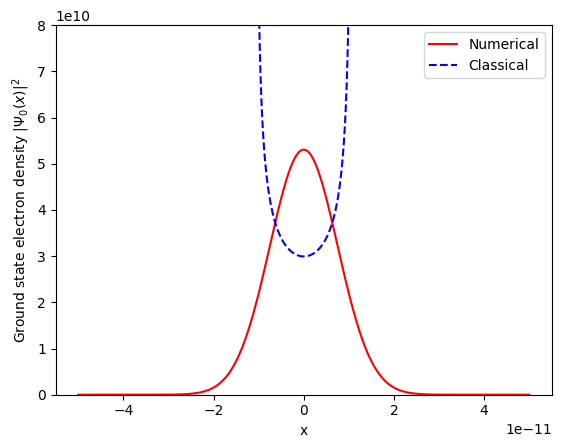

In [ ]:
# Plot of classical probability density

classsical_prob = (1/np.pi) * (np.sqrt(1 / (((2*E)/(m*w**2)) - x**2)))

# Plot
plt.plot(x[5000:15000], Y_exact[5000:15000]**2, 'r')
plt.plot(x[5000:15000], classsical_prob[5000:15000], 'b--')
plt.legend(['Numerical', 'Classical'])
plt.xlabel('x')
plt.ylabel('Ground state electron density $|\Psi_0(x)|^2$')
plt.ylim([0, 8*10**10])
plt.show()
plt.show()


### When the energy is not an eigenvalue of the harmonic oscialltor

<ipython-input-108-cda36cbb35ac>:52: RuntimeWarning: overflow encountered in scalar multiply
  y = (((12 - 10 * f1) * y1) - (f0 * y0)) / f2
<ipython-input-108-cda36cbb35ac>:52: RuntimeWarning: invalid value encountered in scalar subtract
  y = (((12 - 10 * f1) * y1) - (f0 * y0)) / f2


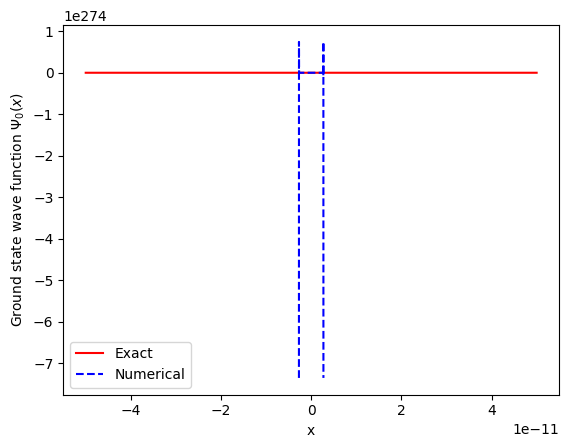

In [ ]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
m = 1.67 * 10**-27
freq = 8.88 * 10**13
w = 2 * np.pi * freq
hbar = 1.054 * 10**-34
# print(m, freq, hbar)

# State index = number of nodes
n = 0

# Define energy (in eV)
E = (n + 0.5) * hbar * w + 10**20   # Here we add this extra term to deviate from an eigen value.

# Grid points in 1D
N = 10000   # Number of grid points.
L = 1 * 10**-10   # Length upto which the wave function will be plotted.
x = np.linspace(0, L, N)
# print(x)

# Step length or grid point interval
dx = L / N

# Potential energy
V = 0.5 * m * w**2 * x**2

# Some functions
g = ((2 * m) / hbar**2) * (E - V)
f = 1 + (g * (dx**2 / 12))
# print(f)
# print(g)

# Initial conditions
A = (1 / (np.sqrt(2**n * math.factorial(n)))) * (((m * w) / (np.pi * hbar))**(0.25))
y0 = A
y1 = ((12 - 10*f[0]) * y0) / (2*f[1])


# Solution of wave function or eigenfunction using Numerov's method
f0 = f[0]
f1 = f[1]
f2 = f[2]

# Collect the wave function values at the grid points
Y_on_positive_x_axis = [y0, y1]

for i in range(2, N):
    y = (((12 - 10 * f1) * y1) - (f0 * y0)) / f2
    Y_on_positive_x_axis.append(y)
    y0 = y1
    y1 = y
    f0 = f[i-1]
    f1 = f[i]
    if i < (N-1):
        f2 = f[i+1]
    else:
        f2 = f[N-1]

Y_on_positive_x_axis = np.array(Y_on_positive_x_axis)
# print(Y_on_positive_x_axis)

# Exact solution
Y_exact = A * np.exp(-0.5 * ((m * w) / hbar) * x**2)

# As the potential is symmetric i.e., V(-x) = V(x), The wave function will be, Psi_n(-x) = (-1)^n Psi_n(x)
Y_on_negative_x_axis = (-1)**n * Y_on_positive_x_axis
# print(Y_on_negative_x_axis)

# Concatenate the solutions of -x and +x axes to get the full range solution
Y_total = np.concatenate((np.flip(Y_on_negative_x_axis), Y_on_positive_x_axis))   # Note that here we first reverse the Y_on_negative_x_axis and then concatenate with the Y_on_positive_x_axis.


# Plot

# Comparison of the numerical and exact solution in the full range (on both the -x and +x axes)

x = np.linspace(-L, L, 2*N)

# Exact solution
Y_exact = A * np.exp(-0.5 * ((m * w) / hbar) * x**2)

# Plot
# Ground state wave function
plt.plot(x[5000:15000], Y_exact[5000:15000], 'r')
plt.plot(x[5000:15000], Y_total[5000:15000], 'b--')
plt.legend(['Exact', 'Numerical'])
plt.xlabel('x')
plt.ylabel('Ground state wave function $\Psi_0(x)$')
plt.show()
plt.show()

# We clearly see that when |x| is small, the numerical solution exactly matches with the exact solution, and
# the numerical solution starts to diverge at large |x| from the exact solution.

# We do not get proper solution when the given energy is not an eigenvalue of the LHO. The numerical wave function
# diverges even at small |x|.

**Effect of number of grid points ($N$) or grid point separation ($dx$):**

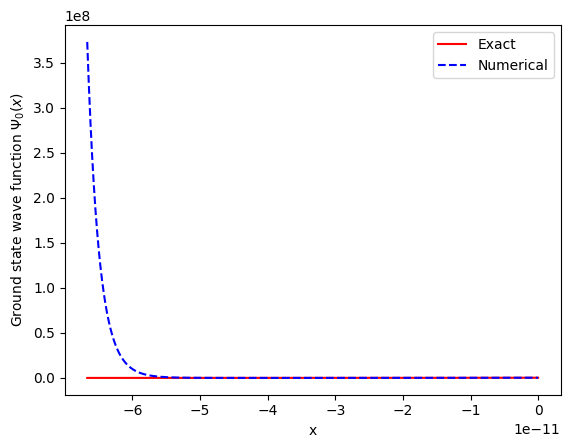

In [ ]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
m = 1.67 * 10**-27
freq = 8.88 * 10**13
w = 2 * np.pi * freq
hbar = 1.054 * 10**-34
# print(m, freq, hbar)

# State index = number of nodes
n = 0

# Define energy (in eV)
E = (n + 0.5) * hbar * w

# Grid points in 1D
N = 15000   # Number of grid points.
L = 1 * 10**-10   # Length upto which the wave function will be plotted.
x = np.linspace(0, L, N)
# print(x)

# Step length or grid point interval
dx = L / N

# Potential energy
V = 0.5 * m * w**2 * x**2

# Some functions
g = ((2 * m) / hbar**2) * (E - V)
f = 1 + (g * (dx**2 / 12))
# print(f)
# print(g)

# Initial conditions
A = (1 / (np.sqrt(2**n * math.factorial(n)))) * (((m * w) / (np.pi * hbar))**(0.25))
y0 = A
y1 = ((12 - 10*f[0]) * y0) / (2*f[1])


# Solution of wave function or eigenfunction using Numerov's method
f0 = f[0]
f1 = f[1]
f2 = f[2]

# Collect the wave function values at the grid points
Y_on_positive_x_axis = [y0, y1]

for i in range(2, N):
    y = (((12 - 10 * f1) * y1) - (f0 * y0)) / f2
    Y_on_positive_x_axis.append(y)
    y0 = y1
    y1 = y
    f0 = f[i-1]
    f1 = f[i]
    if i < (N-1):
        f2 = f[i+1]
    else:
        f2 = f[N-1]

Y_on_positive_x_axis = np.array(Y_on_positive_x_axis)
# print(Y_on_positive_x_axis)

# Exact solution
Y_exact = A * np.exp(-0.5 * ((m * w) / hbar) * x**2)

# As the potential is symmetric i.e., V(-x) = V(x), The wave function will be, Psi_n(-x) = (-1)^n Psi_n(x)
Y_on_negative_x_axis = (-1)**n * Y_on_positive_x_axis
# print(Y_on_negative_x_axis)

# Concatenate the solutions of -x and +x axes to get the full range solution
Y_total = np.concatenate((np.flip(Y_on_negative_x_axis), Y_on_positive_x_axis))   # Note that here we first reverse the Y_on_negative_x_axis and then concatenate with the Y_on_positive_x_axis.


# Plot

# Comparison of the numerical and exact solution in the full range (on both the -x and +x axes)

x = np.linspace(-L, L, 2*N)

# Exact solution
Y_exact = A * np.exp(-0.5 * ((m * w) / hbar) * x**2)

# Plot
# Ground state wave function
plt.plot(x[5000:15000], Y_exact[5000:15000], 'r')
plt.plot(x[5000:15000], Y_total[5000:15000], 'b--')
plt.legend(['Exact', 'Numerical'])
plt.xlabel('x')
plt.ylabel('Ground state wave function $\Psi_0(x)$')
plt.show()
plt.show()

# We clearly see that when |x| is small, the numerical solution exactly matches with the exact solution, and
# the numerical solution starts to diverge at large |x| from the exact solution.

# We do not get proper solution when the number of grid points N or grid point spearation dx is not proper. For too small or too large
# N, the solution is not proper.

### The first excited state

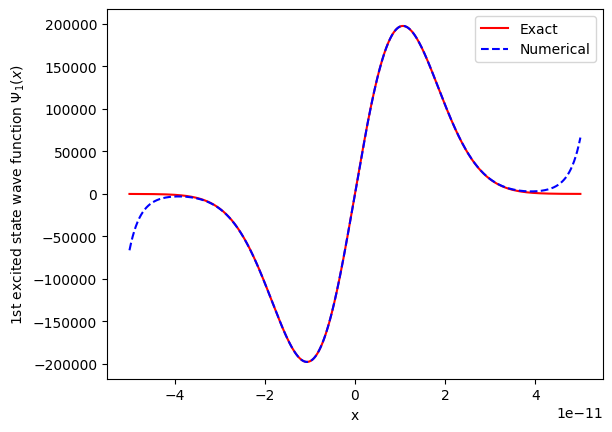

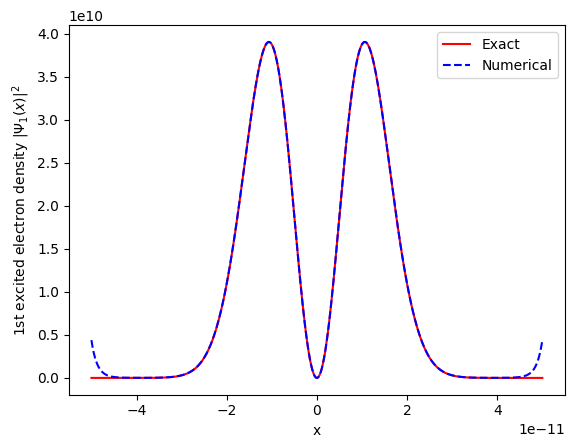

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Parameters
m = 1.67 * 10**-27
freq = 8.88 * 10**13
w = 2 * np.pi * freq
hbar = 1.054 * 10**-34
# print(m, freq, hbar)

# State index = number of nodes
n = 1

# Define energy (in eV)
E = (n + 0.5) * hbar * w

# Grid points in 1D
N = 10000   # Number of grid points.
L = 1 * 10**-10   # Length upto which the wave function will be plotted.
x = np.linspace(0, L, N)
# print(x)

# Step length or grid point interval
dx = L / N

# Potential energy
V = 0.5 * m * w**2 * x**2

# Some functions
g = ((2 * m) / hbar**2) * (E - V)
f = 1 + (g * (dx**2 / 12))
# print(f)
# print(g)

# Initial conditions
A = (1 / (np.sqrt(2**n * math.factorial(n)))) * (((m * w) / (np.pi * hbar))**(0.25))
y0 = 0
y1 = A * np.exp(-(m * w * x[1]**2) / (2 * hbar)) * 2 * np.sqrt((m * w) / hbar) * x[1]   # Exact value at the grid point x[1].


# Solution of wave function or eigenfunction using Numerov's method
f0 = f[0]
f1 = f[1]
f2 = f[2]

# Collect the wave function values at the grid points
Y_on_positive_x_axis = [y0, y1]

for i in range(2, N):
    y = (((12 - 10 * f1) * y1) - (f0 * y0)) / f2
    Y_on_positive_x_axis.append(y)
    y0 = y1
    y1 = y
    f0 = f[i-1]
    f1 = f[i]
    if i < (N-1):
        f2 = f[i+1]
    else:
        f2 = f[N-1]

Y_on_positive_x_axis = np.array(Y_on_positive_x_axis)
# print(Y_on_positive_x_axis)

# As the potential is symmetric i.e., V(-x) = V(x), The wave function will be, Psi_n(-x) = (-1)^n Psi_n(x)
Y_on_negative_x_axis = (-1)**n * Y_on_positive_x_axis
# print(Y_on_negative_x_axis)

# Concatenate the solutions of -x and +x axes to get the full range solution
Y_total = np.concatenate((np.flip(Y_on_negative_x_axis), Y_on_positive_x_axis))   # Note that here we first reverse the Y_on_negative_x_axis and then concatenate with the Y_on_positive_x_axis.


# Plot

# Comparison of the numerical and exact solution in the full range (on both the -x and +x axes)

x = np.linspace(-L, L, 2*N)

# Exact solution
Y_exact = A * np.exp(-0.5 * ((m * w) / hbar) * x**2) * 2 * np.sqrt((m * w) / hbar) * x

# Plot
# 1st excited state wave function
plt.plot(x[5000:15000], Y_exact[5000:15000], 'r')
plt.plot(x[5000:15000], Y_total[5000:15000], 'b--')
plt.legend(['Exact', 'Numerical'])
plt.xlabel('x')
plt.ylabel('1st excited state wave function $\Psi_1(x)$')
plt.show()
plt.show()

# 1st excited state electron density
plt.plot(x[5000:15000], Y_exact[5000:15000]**2, 'r')
plt.plot(x[5000:15000], Y_total[5000:15000]**2, 'b--')
plt.legend(['Exact', 'Numerical'])
plt.xlabel('x')
plt.ylabel('1st excited electron density $|\Psi_1(x)|^2$')
plt.show()
plt.show()

# We clearly see that when |x| is small, the numerical solution exactly matches with the exact solution, and
# the numerical solution starts to diverge at large |x| from the exact solution.

In [ ]:
# Energy eigen values for different states n

for n in range(5):
    print('The energy of LHO for n =', n, 'is', (n+0.5)*hbar*w, 'eV')


The energy of LHO for n = 0 is 2.9403799273126747e-20 eV
The energy of LHO for n = 1 is 8.821139781938023e-20 eV
The energy of LHO for n = 2 is 1.470189963656337e-19 eV
The energy of LHO for n = 3 is 2.058265949118872e-19 eV
The energy of LHO for n = 4 is 2.6463419345814074e-19 eV


In [ ]:
# Eigenvalues in dimensionless unit
for n in range(5):
    print('The energy eigenvalue for n =', n, 'is', n+0.5)

The energy eigenvalue for n = 0 is 0.5
The energy eigenvalue for n = 1 is 1.5
The energy eigenvalue for n = 2 is 2.5
The energy eigenvalue for n = 3 is 3.5
The energy eigenvalue for n = 4 is 4.5


### Starting with initial guess for energy for ground state wave function of Harmonic oscillator

Steps to follow/algorithm:

1. Start with a specific value of state index n.

2. Start with initial guess of energy range $[E_{min}, E_{max}]$ which must contain an energy eigenvalue $E_n$.

3. Start with an energy $E$ which is the mid-point of the given range, $E = \frac{E_{min} + E_{max}}{2}$.

4. Solve for the wave function using the Numerov's method, starting from x = 0 in the direction of positive $x$. At the same time, the number of nodes (i.e. of changes of sign of the function) is counted.

5. If the number of nodes is larger than $n$, $E$ is too high; if the number of nodes is smaller than $n$, $E$ is too low.

6. We then choose the lower half-interval $[E_{min}, E_{max} = E]$, or the upper half-interval $[E_{min} = E, E_{max}]$, respectively.

7. Select a new trial eigenvalue E in the mid-point of the new interval.

8. Iterate the step-3 to step-7 until the energy interval is smaller than a pre-determined threshold, assume that convergence has been achieved.

In the following, we will solve the problem by taking many parameters such as mass, freq. etc. as unity.

**Starting with an initial guess for energy: The ground state**

Enter the value of state index n = 0
Enter the value of y0 (typical value 1 or 2. Give proper positive/negative sign): 2
The number of nodes in the final wave function =  0
The final energy =  0.5008952868520282


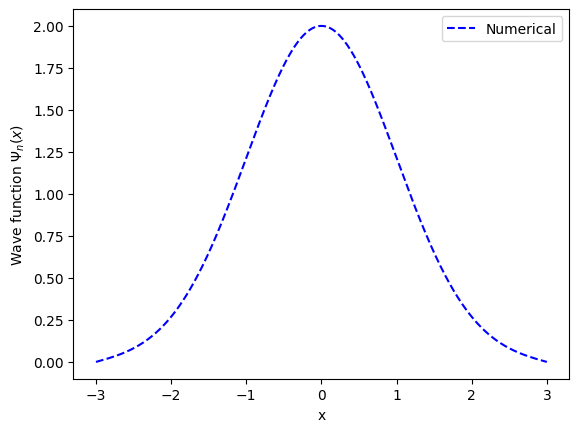

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Initial guess of energy
E_min, E_max = 0, 4
E = 0.5 * (E_min + E_max)

# Intial state index
n = int(input('Enter the value of state index n = '))

# Grid points in 1D
N = 1000  # Number of grid points.
L = 3   # Length upto which the wave function will be plotted.
x = np.linspace(0, L, N)
# print(x)

# Step length or grid point interval
dx = L / N

# Potential energy
V = 0.5 * x**2

# Some functions
g = 2 * (E - V)
f = 1 + (g * (dx**2 / 12))

# Initial conditions
if (n%2) == 0:
    y0 = float(input('Enter the value of y0 (typical value 1 or 2. Give proper positive/negative sign): '))
    a = y0
    y1 = ((12 - 10*f[0]) * y0) / (2*f[1])
    # print(y0, y1)
else:
    y0 = 0
    y1 = float(input('Enter the value of y1 (typical value 1 or 2. Give proper positive/negative sign): '))
    b = y1
    # print(y0, y1)

# Finding the energy eigen value (using bisection method) and the corresponding solution
while (E_max - E_min) > 10**-10:
    # Initial conditions
    if (n%2) == 0:
        y0 = a
        y1 = ((12 - 10*f[0]) * y0) / (2*f[1])
        # print(y0, y1)
    else:
        y0 = 0
        y1 = b
        # print(y0, y1)

    E = 0.5 * (E_min + E_max)

    # Some functions
    g = 2 * (E - V)
    f = 1 + (g * (dx**2 / 12))
    # print(f)
    # print(g)

    f0 = f[0]
    f1 = f[1]
    f2 = f[2]

    # Collect the wave function values at the grid points
    Y_on_positive_x_axis = [y0, y1]
    # print(Y_on_positive_x_axis)

    for i in range(2, N):
        y = (((12 - 10 * f1) * y1) - (f0 * y0)) / f2
        Y_on_positive_x_axis.append(y)
        y0 = y1
        y1 = y
        f0 = f[i-1]
        f1 = f[i]
        if i < (N-1):
            f2 = f[i+1]
        else:
            f2 = f[N-1]

    # Collecting the solutions on both -x and +x axes
    Y_on_positive_x_axis = np.array(Y_on_positive_x_axis)
    Y_on_negative_x_axis = (-1)**n * Y_on_positive_x_axis
    Y_total = np.concatenate((np.flip(Y_on_negative_x_axis), Y_on_positive_x_axis))

    # Number of nodes of the wave function
    num_of_nodes = np.sum(np.abs(np.diff(Y_total > 0)))
    # print('Number of nodes of the wave function = ', num_of_nodes)
    # print('E_max - E_min =', E_max-E_min, 'and Energy, E =', E)

    if num_of_nodes > n:
        E_max = E
    else:
        E_min = E


# Due to numerical error at the two ends, we compute the number of nodes by not taking some data points at the two ends.
print('The number of nodes in the final wave function = ', np.sum(np.abs(np.diff(Y_total[100:1900] > 0))))

# Final energy
print('The final energy = ', E)

# Plot
x = np.linspace(-L, L, 2*N)

# The wave function plot
plt.plot(x, Y_total, 'b--')
plt.legend(['Numerical'])
plt.xlabel('x')
plt.ylabel('Wave function $\Psi_n(x)$')
plt.show()
plt.show()


**Starting with an initial guess for energy: The 1st excited state**

Enter the value of state index n = 1
Enter the value of y1 (typical value 1 or 2. Give proper positive/negative sign): 1
The number of nodes in the final wave function =  1
The final energy =  1.5076335339690559


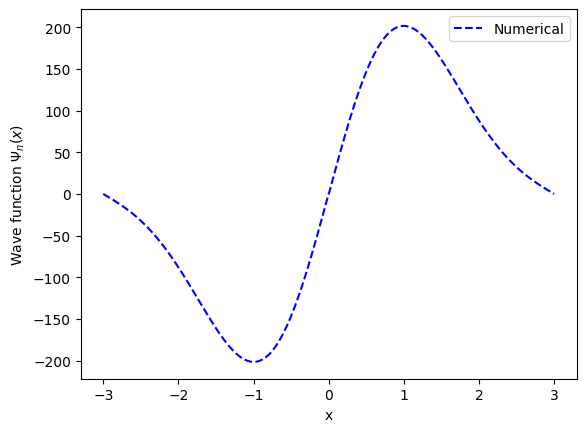

In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Initial guess of energy
E_min, E_max = 0, 4
E = 0.5 * (E_min + E_max)

# Intial state index
n = int(input('Enter the value of state index n = '))

# Grid points in 1D
N = 1000  # Number of grid points.
L = 3   # Length upto which the wave function will be plotted.
x = np.linspace(0, L, N)
# print(x)

# Step length or grid point interval
dx = L / N

# Potential energy
V = 0.5 * x**2

# Some functions
g = 2 * (E - V)
f = 1 + (g * (dx**2 / 12))

# Initial conditions
if (n%2) == 0:
    y0 = float(input('Enter the value of y0 (typical value 1 or 2. Give proper positive/negative sign): '))
    a = y0
    y1 = ((12 - 10*f[0]) * y0) / (2*f[1])
    # print(y0, y1)
else:
    y0 = 0
    y1 = float(input('Enter the value of y1 (typical value 1 or 2. Give proper positive/negative sign): '))
    b = y1
    # print(y0, y1)

# Finding the energy eigen value (using bisection method) and the corresponding solution
while (E_max - E_min) > 10**-10:
    # Initial conditions
    if (n%2) == 0:
        y0 = a
        y1 = ((12 - 10*f[0]) * y0) / (2*f[1])
        # print(y0, y1)
    else:
        y0 = 0
        y1 = b
        # print(y0, y1)

    E = 0.5 * (E_min + E_max)

    # Some functions
    g = 2 * (E - V)
    f = 1 + (g * (dx**2 / 12))
    # print(f)
    # print(g)

    f0 = f[0]
    f1 = f[1]
    f2 = f[2]

    # Collect the wave function values at the grid points
    Y_on_positive_x_axis = [y0, y1]
    # print(Y_on_positive_x_axis)

    for i in range(2, N):
        y = (((12 - 10 * f1) * y1) - (f0 * y0)) / f2
        Y_on_positive_x_axis.append(y)
        y0 = y1
        y1 = y
        f0 = f[i-1]
        f1 = f[i]
        if i < (N-1):
            f2 = f[i+1]
        else:
            f2 = f[N-1]

    # Collecting the solutions on both -x and +x axes
    Y_on_positive_x_axis = np.array(Y_on_positive_x_axis)
    Y_on_negative_x_axis = (-1)**n * Y_on_positive_x_axis
    Y_total = np.concatenate((np.flip(Y_on_negative_x_axis), Y_on_positive_x_axis))

    # Number of nodes of the wave function
    num_of_nodes = np.sum(np.abs(np.diff(Y_total > 0)))
    # print('Number of nodes of the wave function = ', num_of_nodes)
    # print('E_max - E_min =', E_max-E_min, 'and Energy, E =', E)

    if num_of_nodes > n:
        E_max = E
    else:
        E_min = E


# Due to numerical error at the two ends, we compute the number of nodes by not taking some data points at the two ends.
print('The number of nodes in the final wave function = ', np.sum(np.abs(np.diff(Y_total[100:1900] > 0))))

# Final energy
print('The final energy = ', E)

# Plot
x = np.linspace(-L, L, 2*N)

# The wave function plot
plt.plot(x, Y_total, 'b--')
plt.legend(['Numerical'])
plt.xlabel('x')
plt.ylabel('Wave function $\Psi_n(x)$')
plt.show()
plt.show()


**Starting with an initial guess for energy: The 2nd excited state**

Enter the value of state index n = 2
Enter the value of y0 (typical value 1 or 2. Give proper positive/negative sign): -2
The number of nodes in the final wave function =  2
The final energy =  2.5439215060905553


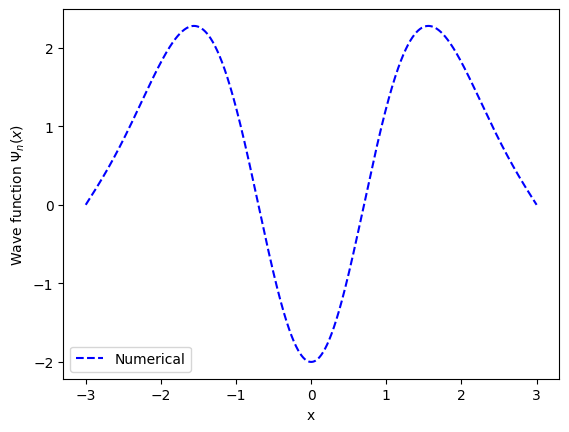

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Initial guess of energy
E_min, E_max = 0, 4
E = 0.5 * (E_min + E_max)

# Intial state index
n = int(input('Enter the value of state index n = '))

# Grid points in 1D
N = 1000  # Number of grid points.
L = 3   # Length upto which the wave function will be plotted.
x = np.linspace(0, L, N)
# print(x)

# Step length or grid point interval
dx = L / N

# Potential energy
V = 0.5 * x**2

# Some functions
g = 2 * (E - V)
f = 1 + (g * (dx**2 / 12))

# Initial conditions
if (n%2) == 0:
    y0 = float(input('Enter the value of y0 (typical value 1 or 2. Give proper positive/negative sign): '))
    a = y0
    y1 = ((12 - 10*f[0]) * y0) / (2*f[1])
    # print(y0, y1)
else:
    y0 = 0
    y1 = float(input('Enter the value of y1 (typical value 1 or 2. Give proper positive/negative sign): '))
    b = y1
    # print(y0, y1)

# Finding the energy eigen value (using bisection method) and the corresponding solution
while (E_max - E_min) > 10**-10:
    # Initial conditions
    if (n%2) == 0:
        y0 = a
        y1 = ((12 - 10*f[0]) * y0) / (2*f[1])
        # print(y0, y1)
    else:
        y0 = 0
        y1 = b
        # print(y0, y1)

    E = 0.5 * (E_min + E_max)

    # Some functions
    g = 2 * (E - V)
    f = 1 + (g * (dx**2 / 12))
    # print(f)
    # print(g)

    f0 = f[0]
    f1 = f[1]
    f2 = f[2]

    # Collect the wave function values at the grid points
    Y_on_positive_x_axis = [y0, y1]
    # print(Y_on_positive_x_axis)

    for i in range(2, N):
        y = (((12 - 10 * f1) * y1) - (f0 * y0)) / f2
        Y_on_positive_x_axis.append(y)
        y0 = y1
        y1 = y
        f0 = f[i-1]
        f1 = f[i]
        if i < (N-1):
            f2 = f[i+1]
        else:
            f2 = f[N-1]

    # Collecting the solutions on both -x and +x axes
    Y_on_positive_x_axis = np.array(Y_on_positive_x_axis)
    Y_on_negative_x_axis = (-1)**n * Y_on_positive_x_axis
    Y_total = np.concatenate((np.flip(Y_on_negative_x_axis), Y_on_positive_x_axis))

    # Number of nodes of the wave function
    num_of_nodes = np.sum(np.abs(np.diff(Y_total > 0)))
    # print('Number of nodes of the wave function = ', num_of_nodes)
    # print('E_max - E_min =', E_max-E_min, 'and Energy, E =', E)

    if num_of_nodes > n:
        E_max = E
    else:
        E_min = E


# Due to numerical error at the two ends, we compute the number of nodes by not taking some data points at the two ends.
print('The number of nodes in the final wave function = ', np.sum(np.abs(np.diff(Y_total[100:1900] > 0))))

# Final energy
print('The final energy = ', E)

# Plot
x = np.linspace(-L, L, 2*N)

# The wave function plot
plt.plot(x, Y_total, 'b--')
plt.legend(['Numerical'])
plt.xlabel('x')
plt.ylabel('Wave function $\Psi_n(x)$')
plt.show()
plt.show()


**Starting with an initial guess for energy: The 3rd excited state**

Enter the value of state index n = 3
Enter the value of y1 (typical value 1 or 2. Give proper positive/negative sign): -1
The number of nodes in the final wave function =  3
The final energy =  3.668705913296435


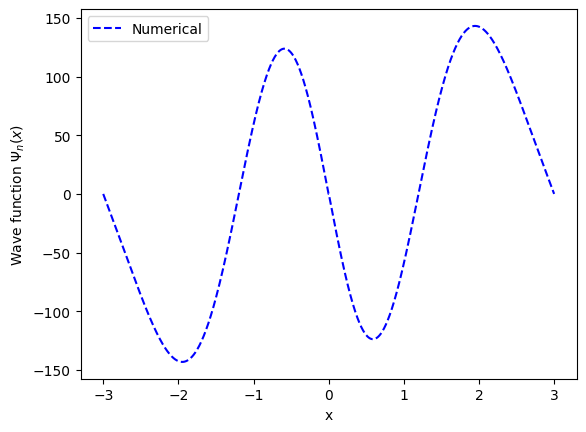

In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Initial guess of energy
E_min, E_max = 0, 4
E = 0.5 * (E_min + E_max)

# Intial state index
n = int(input('Enter the value of state index n = '))

# Grid points in 1D
N = 1000  # Number of grid points.
L = 3   # Length upto which the wave function will be plotted.
x = np.linspace(0, L, N)
# print(x)

# Step length or grid point interval
dx = L / N

# Potential energy
V = 0.5 * x**2

# Some functions
g = 2 * (E - V)
f = 1 + (g * (dx**2 / 12))

# Initial conditions
if (n%2) == 0:
    y0 = float(input('Enter the value of y0 (typical value 1 or 2. Give proper positive/negative sign): '))
    a = y0
    y1 = ((12 - 10*f[0]) * y0) / (2*f[1])
    # print(y0, y1)
else:
    y0 = 0
    y1 = float(input('Enter the value of y1 (typical value 1 or 2. Give proper positive/negative sign): '))
    b = y1
    # print(y0, y1)

# Finding the energy eigen value (using bisection method) and the corresponding solution
while (E_max - E_min) > 10**-10:
    # Initial conditions
    if (n%2) == 0:
        y0 = a
        y1 = ((12 - 10*f[0]) * y0) / (2*f[1])
        # print(y0, y1)
    else:
        y0 = 0
        y1 = b
        # print(y0, y1)

    E = 0.5 * (E_min + E_max)

    # Some functions
    g = 2 * (E - V)
    f = 1 + (g * (dx**2 / 12))
    # print(f)
    # print(g)

    f0 = f[0]
    f1 = f[1]
    f2 = f[2]

    # Collect the wave function values at the grid points
    Y_on_positive_x_axis = [y0, y1]
    # print(Y_on_positive_x_axis)

    for i in range(2, N):
        y = (((12 - 10 * f1) * y1) - (f0 * y0)) / f2
        Y_on_positive_x_axis.append(y)
        y0 = y1
        y1 = y
        f0 = f[i-1]
        f1 = f[i]
        if i < (N-1):
            f2 = f[i+1]
        else:
            f2 = f[N-1]

    # Collecting the solutions on both -x and +x axes
    Y_on_positive_x_axis = np.array(Y_on_positive_x_axis)
    Y_on_negative_x_axis = (-1)**n * Y_on_positive_x_axis
    Y_total = np.concatenate((np.flip(Y_on_negative_x_axis), Y_on_positive_x_axis))

    # Number of nodes of the wave function
    num_of_nodes = np.sum(np.abs(np.diff(Y_total > 0)))
    # print('Number of nodes of the wave function = ', num_of_nodes)
    # print('E_max - E_min =', E_max-E_min, 'and Energy, E =', E)

    if num_of_nodes > n:
        E_max = E
    else:
        E_min = E


# Due to numerical error at the two ends, we compute the number of nodes by not taking some data points at the two ends.
print('The number of nodes in the final wave function = ', np.sum(np.abs(np.diff(Y_total[100:1900] > 0))))

# Final energy
print('The final energy = ', E)

# Plot
x = np.linspace(-L, L, 2*N)

# The wave function plot
plt.plot(x, Y_total, 'b--')
plt.legend(['Numerical'])
plt.xlabel('x')
plt.ylabel('Wave function $\Psi_n(x)$')
plt.show()
plt.show()


**When we start with exact eigenvalue: The ground state**

Number of nodes of the wave function =  0


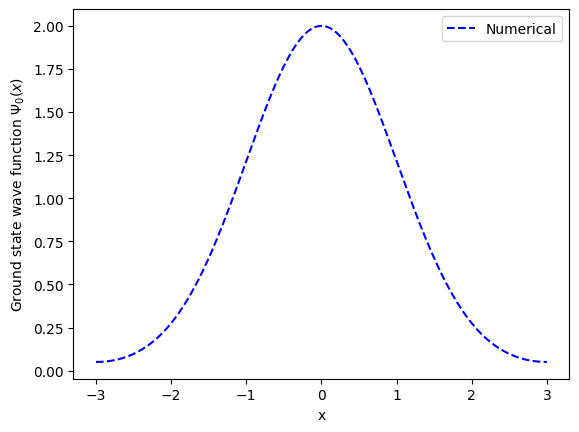

In [ ]:
# Solve for the Harmonic oscillator wave functions by starting with an arbitrary energy. The parameters are dimensionless i.e.,
# mass, freq. etc. are unity.

import numpy as np
import math
import matplotlib.pyplot as plt

# Initial guess of energy
E_min, E_max = 0, 1
E = 0.5 * (E_min + E_max)

# Intial state index
n = 0

# Grid points in 1D
N = 1000   # Number of grid points.
L = 3   # Length upto which the wave function will be plotted.
x = np.linspace(0, L, N)
# print(x)

# Step length or grid point interval
dx = L / N

# Potential energy
V = 0.5 * x**2

# Some functions
g = 2 * (E - V)
f = 1 + (g * (dx**2 / 12))
# print(f)
# print(g)

# Initial conditions
if (n%2) == 0:
    y0 = 2
    y1 = ((12 - 10*f[0]) * y0) / (2*f[1])
    # print(y0, y1)
else:
    y0 = 0
    y1 = 1
    # print(y0, y1)


# Solution of wave function or eigenfunction using Numerov's method
f0 = f[0]
f1 = f[1]
f2 = f[2]

# Collect the wave function values at the grid points
Y_on_positive_x_axis = [y0, y1]

for i in range(2, N):
    y = (((12 - 10 * f1) * y1) - (f0 * y0)) / f2
    Y_on_positive_x_axis.append(y)
    y0 = y1
    y1 = y
    f0 = f[i-1]
    f1 = f[i]
    if i < (N-1):
        f2 = f[i+1]
    else:
        f2 = f[N-1]

Y_on_positive_x_axis = np.array(Y_on_positive_x_axis)
# print(Y_on_positive_x_axis)

# As the potential is symmetric i.e., V(-x) = V(x), The wave function will be, Psi_n(-x) = (-1)^n Psi_n(x)
Y_on_negative_x_axis = (-1)**n * Y_on_positive_x_axis
# print(Y_on_negative_x_axis)

# Concatenate the solutions of -x and +x axes to get the full range solution
Y_total = np.concatenate((np.flip(Y_on_negative_x_axis), Y_on_positive_x_axis))   # Note that here we first reverse the Y_on_negative_x_axis and then concatenate with the Y_on_positive_x_axis.
# print('The wave function array = \n', Y_total)

# Compute number of nodes of the wave function i.e., number of change of sign of the wave function array
print('Number of nodes of the wave function = ', np.sum(np.abs(np.diff(Y_total > 0))))


# Plot
x = np.linspace(-L, L, 2*N)

# Ground state wave function
plt.plot(x, Y_total, 'b--')
plt.legend(['Numerical'])
plt.xlabel('x')
plt.ylabel('Ground state wave function $\Psi_0(x)$')
plt.show()
plt.show()


**When we start with exact eigenvalue: The 1st excited state**

Number of nodes of the wave function =  1


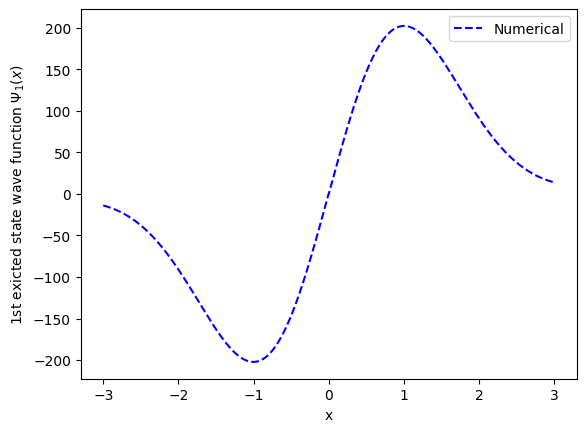

In [ ]:
# Solve for the Harmonic oscillator wave functions by starting with an arbitrary energy. The parameters are dimensionless i.e.,
# mass, freq. etc. are dimension less.

import numpy as np
import math
import matplotlib.pyplot as plt

# Initial guess of energy
E_min, E_max = 1, 2
E = 0.5 * (E_min + E_max)

# Intial state index
n = 1

# Grid points in 1D
N = 1000   # Number of grid points.
L = 3   # Length upto which the wave function will be plotted.
x = np.linspace(0, L, N)
# print(x)

# Step length or grid point interval
dx = L / N

# Potential energy
V = 0.5 * x**2

# Some functions
g = 2 * (E - V)
f = 1 + (g * (dx**2 / 12))
# print(f)
# print(g)

# Initial conditions
if (n%2) == 0:
    y0 = 2
    y1 = ((12 - 10*f[0]) * y0) / (2*f[1])
    # print(y0, y1)
else:
    y0 = 0
    y1 = 1
    # print(y0, y1)


# Solution of wave function or eigenfunction using Numerov's method
f0 = f[0]
f1 = f[1]
f2 = f[2]

# Collect the wave function values at the grid points
Y_on_positive_x_axis = [y0, y1]

for i in range(2, N):
    y = (((12 - 10 * f1) * y1) - (f0 * y0)) / f2
    Y_on_positive_x_axis.append(y)
    y0 = y1
    y1 = y
    f0 = f[i-1]
    f1 = f[i]
    if i < (N-1):
        f2 = f[i+1]
    else:
        f2 = f[N-1]

Y_on_positive_x_axis = np.array(Y_on_positive_x_axis)
# print(Y_on_positive_x_axis)

# As the potential is symmetric i.e., V(-x) = V(x), The wave function will be, Psi_n(-x) = (-1)^n Psi_n(x)
Y_on_negative_x_axis = (-1)**n * Y_on_positive_x_axis
# print(Y_on_negative_x_axis)

# Concatenate the solutions of -x and +x axes to get the full range solution
Y_total = np.concatenate((np.flip(Y_on_negative_x_axis), Y_on_positive_x_axis))   # Note that here we first reverse the Y_on_negative_x_axis and then concatenate with the Y_on_positive_x_axis.
# print('The wave function array = \n', Y_total)

# Compute number of nodes of the wave function i.e., number of change of sign of the wave function array
print('Number of nodes of the wave function = ', np.sum(np.abs(np.diff(Y_total > 0))))


# Plot
x = np.linspace(-L, L, 2*N)

# 1st excited state wave function
plt.plot(x, Y_total, 'b--')
plt.legend(['Numerical'])
plt.xlabel('x')
plt.ylabel('1st exicted state wave function $\Psi_1(x)$')
plt.show()
plt.show()


## Double well potential

The double well potential is given by,

$V(x) = \epsilon \left[(\frac{x}{\delta})^4 - 2 (\frac{x}{\delta})^2 + 1 \right]$  , $\epsilon, \delta > 0$.

This can be written as,

$V(x) = \epsilon \left[(\frac{x}{\delta})^2 - 1 \right]^2 = \frac{\epsilon}{\delta^4} \left[x^2 - \delta^2 \right]^2$  .

Reference of this double well potential is: https://arxiv.org/pdf/1209.2521.pdf

Plot of the Double well potential:

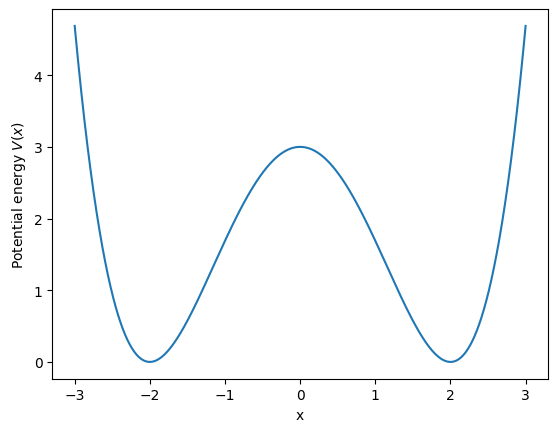

In [ ]:
# Here we will take dimensionless parameters i.e., mass, frequency etc. will be unity.

import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
epsilon = 3
delta = 2

# Grid points in 1D
N = 1000   # Number of grid points.
L = 3   # Length upto which the wave function will be plotted.
x = np.linspace(0, L, N)
# print(x)

# Potential energy
V = epsilon * (((x/delta)**2 - 1)**2)

# Potential is symmetric i.e., V(-x) = V(x)
V = np.concatenate((np.flip(V), V))

# Re-define the grid. Now on both -x and +x axes.
x = np.linspace(-L, L, 2*N)

# Plot
# Potential energy
plt.plot(x, V)
plt.xlabel('x')
plt.ylabel('Potential energy $V(x)$')
plt.show()


**Starting with an initial guess for energy: The ground state**

Enter the value of state index n = 0
Enter the value of y0 (typical value 1 or 2. Give proper positive/negative sign): 0.2
The number of nodes in the final wave function =  0
The final energy =  1.1426849234267138


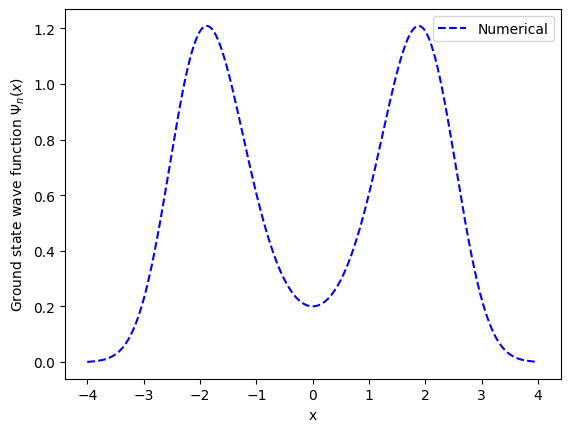

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Initial guess of energy
E_min, E_max = 0, 4
E = 0.5 * (E_min + E_max)

# Parameters
epsilon = 3
delta = 2

# Intial state index
n = int(input('Enter the value of state index n = '))

# Grid points in 1D
N = 1000  # Number of grid points.
L = 4   # Length upto which the wave function will be plotted.
x = np.linspace(0, L, N)
# print(x)

# Step length or grid point interval
dx = L / N

# Potential energy
V = epsilon * (((x/delta)**2 - 1)**2)

# Some functions
g = 2 * (E - V)
f = 1 + (g * (dx**2 / 12))

# Initial conditions
if (n%2) == 0:
    y0 = float(input('Enter the value of y0 (typical value 1 or 2. Give proper positive/negative sign): '))
    a = y0
    y1 = ((12 - 10*f[0]) * y0) / (2*f[1])
    # print(y0, y1)
else:
    y0 = 0
    y1 = float(input('Enter the value of y1 (typical value 1 or 2. Give proper positive/negative sign): '))
    b = y1
    # print(y0, y1)

# Finding the energy eigen value (using bisection method) and the corresponding solution
while (E_max - E_min) > 10**-10:
    # Initial conditions
    if (n%2) == 0:
        y0 = a
        y1 = ((12 - 10*f[0]) * y0) / (2*f[1])
        # print(y0, y1)
    else:
        y0 = 0
        y1 = b
        # print(y0, y1)

    E = 0.5 * (E_min + E_max)

    # Some functions
    g = 2 * (E - V)
    f = 1 + (g * (dx**2 / 12))
    # print(f)
    # print(g)

    f0 = f[0]
    f1 = f[1]
    f2 = f[2]

    # Collect the wave function values at the grid points
    Y_on_positive_x_axis = [y0, y1]
    # print(Y_on_positive_x_axis)

    for i in range(2, N):
        y = (((12 - 10 * f1) * y1) - (f0 * y0)) / f2
        Y_on_positive_x_axis.append(y)
        y0 = y1
        y1 = y
        f0 = f[i-1]
        f1 = f[i]
        if i < (N-1):
            f2 = f[i+1]
        else:
            f2 = f[N-1]

    # Collecting the solutions on both -x and +x axes
    Y_on_positive_x_axis = np.array(Y_on_positive_x_axis)
    Y_on_negative_x_axis = (-1)**n * Y_on_positive_x_axis
    Y_total = np.concatenate((np.flip(Y_on_negative_x_axis), Y_on_positive_x_axis))

    # Number of nodes of the wave function
    num_of_nodes = np.sum(np.abs(np.diff(Y_total > 0)))
    # print('Number of nodes of the wave function = ', num_of_nodes)
    # print('E_max - E_min =', E_max-E_min, 'and Energy, E =', E)

    if num_of_nodes > n:
        E_max = E
    else:
        E_min = E


# Due to numerical error at the two ends, we compute the number of nodes by not taking some data points at the two ends.
print('The number of nodes in the final wave function = ', np.sum(np.abs(np.diff(Y_total[100:1900] > 0))))

# Final energy
print('The final energy = ', E)

# Plot
x = np.linspace(-L, L, 2*N)

# The wave function plot
plt.plot(x, Y_total, 'b--')
plt.legend(['Numerical'])
plt.xlabel('x')
plt.ylabel('Ground state wave function $\Psi_n(x)$')
plt.show()
plt.show()

# We see that the ground state wave function of the double-well potential is similar to the single-well harmonic oscialltor
# potential with two Gaussian type wave functions in each of the two potential wells.
# The result is in agreement with the ref.: https://arxiv.org/pdf/1209.2521.pdf.

**Starting with an initial guess for energy: The 1st excited state**

Enter the value of state index n = 1
Enter the value of y1 (typical value 1 or 2. Give proper positive/negative sign): -1
The number of nodes in the final wave function =  1
The final energy =  1.1636480392771773


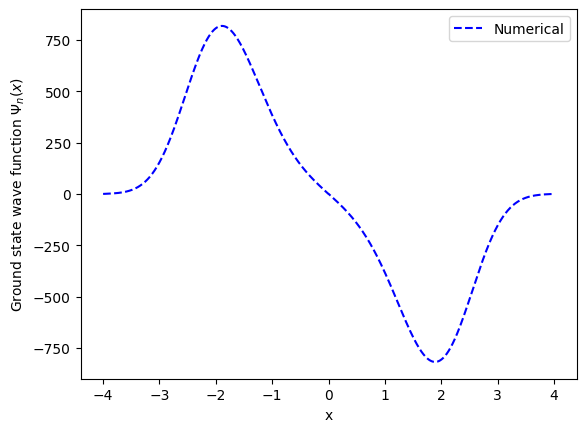

In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Initial guess of energy
E_min, E_max = 0, 4
E = 0.5 * (E_min + E_max)

# Parameters
epsilon = 3
delta = 2

# Intial state index
n = int(input('Enter the value of state index n = '))

# Grid points in 1D
N = 1000  # Number of grid points.
L = 4   # Length upto which the wave function will be plotted.
x = np.linspace(0, L, N)
# print(x)

# Step length or grid point interval
dx = L / N

# Potential energy
V = epsilon * (((x/delta)**2 - 1)**2)

# Some functions
g = 2 * (E - V)
f = 1 + (g * (dx**2 / 12))

# Initial conditions
if (n%2) == 0:
    y0 = float(input('Enter the value of y0 (typical value 1 or 2. Give proper positive/negative sign): '))
    a = y0
    y1 = ((12 - 10*f[0]) * y0) / (2*f[1])
    # print(y0, y1)
else:
    y0 = 0
    y1 = float(input('Enter the value of y1 (typical value 1 or 2. Give proper positive/negative sign): '))
    b = y1
    # print(y0, y1)

# Finding the energy eigen value (using bisection method) and the corresponding solution
while (E_max - E_min) > 10**-10:
    # Initial conditions
    if (n%2) == 0:
        y0 = a
        y1 = ((12 - 10*f[0]) * y0) / (2*f[1])
        # print(y0, y1)
    else:
        y0 = 0
        y1 = b
        # print(y0, y1)

    E = 0.5 * (E_min + E_max)

    # Some functions
    g = 2 * (E - V)
    f = 1 + (g * (dx**2 / 12))
    # print(f)
    # print(g)

    f0 = f[0]
    f1 = f[1]
    f2 = f[2]

    # Collect the wave function values at the grid points
    Y_on_positive_x_axis = [y0, y1]
    # print(Y_on_positive_x_axis)

    for i in range(2, N):
        y = (((12 - 10 * f1) * y1) - (f0 * y0)) / f2
        Y_on_positive_x_axis.append(y)
        y0 = y1
        y1 = y
        f0 = f[i-1]
        f1 = f[i]
        if i < (N-1):
            f2 = f[i+1]
        else:
            f2 = f[N-1]

    # Collecting the solutions on both -x and +x axes
    Y_on_positive_x_axis = np.array(Y_on_positive_x_axis)
    Y_on_negative_x_axis = (-1)**n * Y_on_positive_x_axis
    Y_total = np.concatenate((np.flip(Y_on_negative_x_axis), Y_on_positive_x_axis))

    # Number of nodes of the wave function
    num_of_nodes = np.sum(np.abs(np.diff(Y_total > 0)))
    # print('Number of nodes of the wave function = ', num_of_nodes)
    # print('E_max - E_min =', E_max-E_min, 'and Energy, E =', E)

    if num_of_nodes > n:
        E_max = E
    else:
        E_min = E


# Due to numerical error at the two ends, we compute the number of nodes by not taking some data points at the two ends.
print('The number of nodes in the final wave function = ', np.sum(np.abs(np.diff(Y_total[100:1900] > 0))))

# Final energy
print('The final energy = ', E)

# Plot
x = np.linspace(-L, L, 2*N)

# The wave function plot
plt.plot(x, Y_total, 'b--')
plt.legend(['Numerical'])
plt.xlabel('x')
plt.ylabel('Ground state wave function $\Psi_n(x)$')
plt.show()
plt.show()

# The result is in agreement with the ref.: https://arxiv.org/pdf/1209.2521.pdf.

## Breaking of inversion symmetry: The Morse potential

The *Morse potential* is given by,

$V(x) = D \left[ e^{-2a(x-x_0)} - 2e^{-a(x-x_0)} + 1 \right]$  ,

which is widely used to model the potential energy of a diamotic molecule.

Here, $x_e = $ equilibrium bond distance, $D = $ potential well depth, $a = $ potential well width, $x = $ distance between the two atoms.

First plot the potential energy:

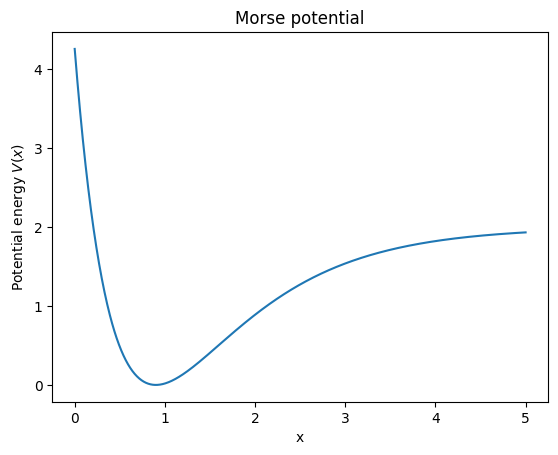

In [2]:
# Here we will take dimensionless parameters i.e., mass, frequency etc. will be unity.

import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
D = 2
a = 1
x_e = 0.9

# Grid points in 1D
N = 1000   # Number of grid points.
L = 5   # Length upto which the wave function will be plotted.
x = np.linspace(0, L, N)
# print(x)

# Potential energy
V = D * (np.exp(-2*a*(x-x_e)) - 2*np.exp(-a*(x-x_e)) + 1)

# Plot
# Potential energy
plt.plot(x, V)
plt.xlabel('x')
plt.ylabel('Potential energy $V(x)$')
plt.title('Morse potential')
plt.show()


**Starting with an initial guess for energy: The ground state**

Enter the value of state index n = 0
Enter the value of y0 (typical value 1 or 2. Give proper positive/negative sign): 0.1
The number of nodes in the final wave function =  1
The final energy =  0.7556713697849773


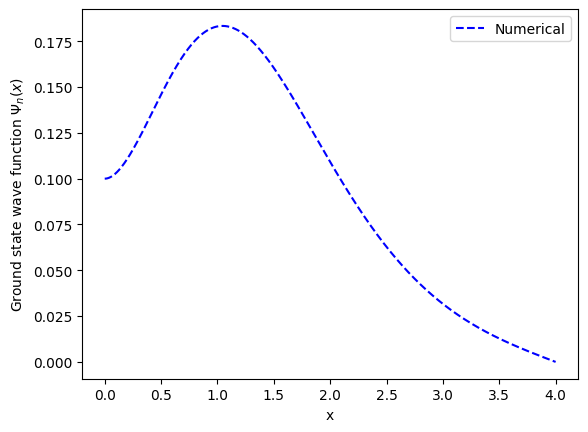

In [19]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Initial guess of energy
E_min, E_max = 0, 4
E = 0.5 * (E_min + E_max)

# Parameters
D = 2   # potential well depth.
a = 1   # potential well width.
x_e = 0.9   # equilibrium bond length of two atoms.

# Intial state index
n = int(input('Enter the value of state index n = '))

# Grid points in 1D
N = 1000  # Number of grid points.
L = 4   # Length upto which the wave function will be plotted.
x = np.linspace(0, L, N)
# print(x)

# Step length or grid point interval
dx = L / N

# Potential energy
V = D * (np.exp(-2*a*(x-x_e)) - 2*np.exp(-a*(x-x_e)) + 1)

# Some functions
g = 2 * (E - V)
f = 1 + (g * (dx**2 / 12))

# Initial conditions
if (n%2) == 0:
    y0 = float(input('Enter the value of y0 (typical value 1 or 2. Give proper positive/negative sign): '))
    a = y0
    y1 = ((12 - 10*f[0]) * y0) / (2*f[1])
    # print(y0, y1)
else:
    y0 = 0
    y1 = float(input('Enter the value of y1 (typical value 1 or 2. Give proper positive/negative sign): '))
    b = y1
    # print(y0, y1)

# Finding the energy eigen value (using bisection method) and the corresponding solution
while (E_max - E_min) > 10**-10:
    # Initial conditions
    if (n%2) == 0:
        y0 = a
        y1 = ((12 - 10*f[0]) * y0) / (2*f[1])
        # print(y0, y1)
    else:
        y0 = 0
        y1 = b
        # print(y0, y1)

    E = 0.5 * (E_min + E_max)

    # Some functions
    g = 2 * (E - V)
    f = 1 + (g * (dx**2 / 12))
    # print(f)
    # print(g)

    f0 = f[0]
    f1 = f[1]
    f2 = f[2]

    # Collect the wave function values at the grid points
    Y_on_positive_x_axis = [y0, y1]
    # print(Y_on_positive_x_axis)

    for i in range(2, N):
        y = (((12 - 10 * f1) * y1) - (f0 * y0)) / f2
        Y_on_positive_x_axis.append(y)
        y0 = y1
        y1 = y
        f0 = f[i-1]
        f1 = f[i]
        if i < (N-1):
            f2 = f[i+1]
        else:
            f2 = f[N-1]

    # Collecting the solutions on both -x and +x axes
    Y_on_positive_x_axis = np.array(Y_on_positive_x_axis)
    # Y_on_negative_x_axis = (-1)**n * Y_on_positive_x_axis
    # Y_total = np.concatenate((np.flip(Y_on_negative_x_axis), Y_on_positive_x_axis))

    # Number of nodes of the wave function
    num_of_nodes = np.sum(np.abs(np.diff(Y_on_positive_x_axis > 0)))
    # print('Number of nodes of the wave function = ', num_of_nodes)
    # print('E_max - E_min =', E_max-E_min, 'and Energy, E =', E)

    if num_of_nodes > n:
        E_max = E
    else:
        E_min = E


# Due to numerical error at the two ends, we compute the number of nodes by not taking some data points at the two ends.
print('The number of nodes in the final wave function = ', np.sum(np.abs(np.diff(Y_on_positive_x_axis[100:1900] > 0))))

# Final energy
print('The final energy = ', E)

# Plot
# x = np.linspace(-L, L, 2*N)

# The wave function plot
plt.plot(x, Y_on_positive_x_axis, 'b--')
plt.legend(['Numerical'])
plt.xlabel('x')
plt.ylabel('Ground state wave function $\Psi_n(x)$')
plt.show()
plt.show()
